<a href="https://colab.research.google.com/github/mfarias76/MVP_PUCRJ_Sprint1_MachineLearning/blob/main/dino_mvp_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP: *Machine Learning & Analytics*
**Autor:** Mario Henrique Botelho Farias  

**Data:** 04/09/2025

**Matrícula:** 4052025001116

**Dataset:** [Dino Dataset] https://www.kaggle.com/datasets/canozensoy/dinosaur-genera-dataset?resource=download&select=dinoDatasetCSV.csv


#**1. Escopo, objetivo e definição do problema**

Embora o *dataset* seja uma boa base científica para o estudo dos dinossauros, minha escolha foi motivada pelo interesse do meu filho sobre o tema. Dessa forma, tornando essa análise uma oportunidade para pesquisa de curiosidades e construção de conhecimento.

#**2. Reprodutibilidade e ambiente**

In [ ]:
import os, difflib, json, math
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


In [ ]:

FIG_DIR = "figures"
os.makedirs(FIG_DIR, exist_ok=True)

def save_fig(fname):
    """Salva a figura atual na pasta de figuras."""
    path = os.path.join(FIG_DIR, fname)
    plt.tight_layout()
    plt.savefig(path, dpi=120, bbox_inches="tight")
    print(f"↳ Figura salva em: {path}")


# **3. Dependências**

In [ ]:
!pip install -q pandas numpy scikit-learn matplotlib


# **4. Carregamento do CSV**

In [ ]:
import pandas as pd

# Arquivo CSV copiado para pasta home
filename = "dinoDatasetCSV.csv"
dino = pd.read_csv(filename)
print(type(dino))
dino.head(30)


<class 'pandas.core.frame.DataFrame'>


,scientific_name,common_name,meaning,diet,length_m,weight_kg,height_m,locomotion,geological_period,lived_in,behavior_notes,first_discovered,fossil_location,notable_features,intelligence_level,source_link,row_index
0,Abelisaurus,Abelisaurus,Abel's lizard,Carnivore,7.0,1500.00,2.40,Bipedal,Late Cretaceous,Argentina,Large theropod,1985,Argentina,Short arms,Medium,https://en.wikipedia.org/wiki/Abelisaurus,0
1,Abrictosaurus,Abrictosaurus,Wakeful lizard,Herbivore,1.5,15.00,0.50,Bipedal,Early Jurassic,South Africa,Small herbivore,1974,South Africa,Unique teeth,Medium,https://en.wikipedia.org/wiki/Abrictosaurus,1
2,Abrosaurus,Abrosaurus,Delicate lizard,Herbivore,9.0,2000.00,4.50,Quadrupedal,Middle Jurassic,China,Delicate skull,1959,China,Delicate skull,Medium,https://en.wikipedia.org/wiki/Abrosaurus,2
3,Abydosaurus,Abydosaurus,Abydos lizard,Herbivore,18.0,30000.00,6.00,Quadrupedal,Early Cretaceous,USA,Basal sauropod,2010,USA,Complete skull,Medium,https://en.wikipedia.org/wiki/Abydosaurus,3
4,Acantholipan,Acantholipan,Spiny shield,Herbivore,5.0,2500.00,1.50,Quadrupedal,Late Cretaceous,Mexico,Armored nodosaur,2011,Mexico,Clubless armored tail,Medium,https://en.wikipedia.org/wiki/Acantholipan,4
5,Acanthopholis,Acanthopholis,Spiny scales,Herbivore,4.0,1000.00,1.20,Quadrupedal,Early Cretaceous,UK,Spiny armor,1865,UK,Dermal armor,Medium,https://en.wikipedia.org/wiki/Acanthopholis,5
6,Achelousaurus,Achelousaurus,Achelous lizard,Herbivore,6.0,2500.00,2.00,Quadrupedal,Late Cretaceous,USA,Ceratopsid nose boss,1993,USA,Nose boss,Medium,https://en.wikipedia.org/wiki/Achelousaurus,6
7,Acheroraptor,Acheroraptor,Acheron thief,Carnivore,2.5,50.00,1.00,Bipedal,Late Cretaceous,USA,Dromaeosaurid,2011,USA,Complete skull,Medium,https://en.wikipedia.org/wiki/Acheroraptor,7
8,Achillesaurus,Achillesaurus,Achilles lizard,Carnivore,6.0,600.00,2.00,Bipedal,Late Cretaceous,Argentina,No maxillary teeth,2007,Argentina,Slender limbs,Medium,https://en.wikipedia.org/wiki/Achillesaurus,8
9,Albertosaurus,Albertosaurus,Different lizard,Carnivore,12.0,2000.00,3.50,Bipedal,Late Jurassic,North America,Pack hunter,1877,USA,Large skull,Medium,https://en.wikipedia.org/wiki/Albertosaurus,9


# **5. Configuração**

In [ ]:

CONFIG = {
    "auto_detect": True,        # se False, usa exatamente as colunas abaixo
    "name_col": None,           # "name"
    "numeric_cols": [],         # ["length_m","mass_kg"]
    "categorical_cols": [],     # ["diet","period"]
    "k_top": 5,
    "example_query": None,      # "espécie do dinossauro: Tyrannosaurus"
    "export_html": True,
    "html_out": "relatorio_dinos.html"
}

DATA_PATH = "dinoDatasetCSV.csv"
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError("Arquivo 'dinoDatasetCSV.csv' não encontrado.")


## **6. Carregamento do Dataset**

In [ ]:

df = pd.read_csv(DATA_PATH)
print("Dimensões:", df.shape)
display(df.head(30))


Dimensões: (1542, 17)


,scientific_name,common_name,meaning,diet,length_m,weight_kg,height_m,locomotion,geological_period,lived_in,behavior_notes,first_discovered,fossil_location,notable_features,intelligence_level,source_link,row_index
0,Abelisaurus,Abelisaurus,Abel's lizard,Carnivore,7.0,1500.00,2.40,Bipedal,Late Cretaceous,Argentina,Large theropod,1985,Argentina,Short arms,Medium,https://en.wikipedia.org/wiki/Abelisaurus,0
1,Abrictosaurus,Abrictosaurus,Wakeful lizard,Herbivore,1.5,15.00,0.50,Bipedal,Early Jurassic,South Africa,Small herbivore,1974,South Africa,Unique teeth,Medium,https://en.wikipedia.org/wiki/Abrictosaurus,1
2,Abrosaurus,Abrosaurus,Delicate lizard,Herbivore,9.0,2000.00,4.50,Quadrupedal,Middle Jurassic,China,Delicate skull,1959,China,Delicate skull,Medium,https://en.wikipedia.org/wiki/Abrosaurus,2
3,Abydosaurus,Abydosaurus,Abydos lizard,Herbivore,18.0,30000.00,6.00,Quadrupedal,Early Cretaceous,USA,Basal sauropod,2010,USA,Complete skull,Medium,https://en.wikipedia.org/wiki/Abydosaurus,3
4,Acantholipan,Acantholipan,Spiny shield,Herbivore,5.0,2500.00,1.50,Quadrupedal,Late Cretaceous,Mexico,Armored nodosaur,2011,Mexico,Clubless armored tail,Medium,https://en.wikipedia.org/wiki/Acantholipan,4
5,Acanthopholis,Acanthopholis,Spiny scales,Herbivore,4.0,1000.00,1.20,Quadrupedal,Early Cretaceous,UK,Spiny armor,1865,UK,Dermal armor,Medium,https://en.wikipedia.org/wiki/Acanthopholis,5
6,Achelousaurus,Achelousaurus,Achelous lizard,Herbivore,6.0,2500.00,2.00,Quadrupedal,Late Cretaceous,USA,Ceratopsid nose boss,1993,USA,Nose boss,Medium,https://en.wikipedia.org/wiki/Achelousaurus,6
7,Acheroraptor,Acheroraptor,Acheron thief,Carnivore,2.5,50.00,1.00,Bipedal,Late Cretaceous,USA,Dromaeosaurid,2011,USA,Complete skull,Medium,https://en.wikipedia.org/wiki/Acheroraptor,7
8,Achillesaurus,Achillesaurus,Achilles lizard,Carnivore,6.0,600.00,2.00,Bipedal,Late Cretaceous,Argentina,No maxillary teeth,2007,Argentina,Slender limbs,Medium,https://en.wikipedia.org/wiki/Achillesaurus,8
9,Albertosaurus,Albertosaurus,Different lizard,Carnivore,12.0,2000.00,3.50,Bipedal,Late Jurassic,North America,Pack hunter,1877,USA,Large skull,Medium,https://en.wikipedia.org/wiki/Albertosaurus,9


## **7. Esquema**

In [ ]:

possiveis_nomes = ["name","Name","dino","Dino","dinosaur","Dinosaur","dino_name","species","Species","Scientific name","scientific_name"]

name_col = CONFIG.get("name_col")
if CONFIG.get("auto_detect", True):
    if not name_col:
        for c in df.columns:
            if c in possiveis_nomes:
                name_col = c
                break
    if not name_col:
        unicos = [c for c in df.columns if df[c].astype(str).nunique() == len(df)]
        name_col = unicos[0] if unicos else df.columns[0]

num_cols_auto = list(df.select_dtypes(include=[np.number]).columns)
cat_cols_auto = [c for c in df.columns if c not in num_cols_auto and c != name_col]

num_cols = CONFIG.get("numeric_cols") or num_cols_auto
cat_cols = CONFIG.get("categorical_cols") or cat_cols_auto

num_cols = [c for c in num_cols if c != name_col]
cat_cols = [c for c in cat_cols if c != name_col]

print("Coluna de nome/ID:", name_col)
print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

names = df[name_col].astype(str).fillna("Desconhecido").reset_index(drop=True)


Coluna de nome/ID: scientific_name
Numéricas: ['length_m', 'weight_kg', 'height_m', 'row_index']
Categóricas: ['common_name', 'meaning', 'diet', 'locomotion', 'geological_period', 'lived_in', 'behavior_notes', 'first_discovered', 'fossil_location', 'notable_features', 'intelligence_level', 'source_link']


## **8. Pré-processamento**


In [ ]:

df[num_cols] = df[num_cols].fillna(0)
df[cat_cols] = df[cat_cols].fillna("desconhecido")

numeric_transformer = StandardScaler(with_mean=False)

try:
    # scikit-learn >= 1.2
    categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
except TypeError:
    # scikit-learn < 1.2
    categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse=True)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop",
    sparse_threshold=1.0
)

pipeline = Pipeline(steps=[("prep", preprocess)])
X = pipeline.fit_transform(df)

print("Matriz após transformação:", X.shape, "sparse =", hasattr(X, "tocsr"))

sumario = []
sumario += [{"feature": c, "tipo_original": "numérico", "transformacao": "StandardScaler", "faltantes": int(df[c].isna().sum())} for c in num_cols]
sumario += [{"feature": c, "tipo_original": "categórico", "transformacao": "OneHotEncoder", "faltantes": int(df[c].isna().sum())} for c in cat_cols]
df_sumario = pd.DataFrame(sumario)[["feature","tipo_original","transformacao","faltantes"]]

def format_sumario(d):
    return (d.style
            .hide(axis='index')
            .set_table_attributes('style="border-collapse:collapse; width:100%;"')
            .set_properties(**{"text-align":"left", "padding":"6px"})
            .set_caption("Sumário de Pré-processamento"))
display(format_sumario(df_sumario))


Matriz após transformação: (1542, 6505) sparse = True


feature,tipo_original,transformacao,faltantes
length_m,numérico,StandardScaler,0
weight_kg,numérico,StandardScaler,0
height_m,numérico,StandardScaler,0
row_index,numérico,StandardScaler,0
common_name,categórico,OneHotEncoder,0
meaning,categórico,OneHotEncoder,0
diet,categórico,OneHotEncoder,0
locomotion,categórico,OneHotEncoder,0
geological_period,categórico,OneHotEncoder,0
lived_in,categórico,OneHotEncoder,0


## **9. Funções python**

In [ ]:

nn = NearestNeighbors(metric="cosine", algorithm="brute")
nn.fit(X)

def _resolver_nome(query: str):
    candidatos = names.tolist()
    if query in candidatos:
        return query
    match = difflib.get_close_matches(query, candidatos, n=1, cutoff=0.6)
    return match[0] if match else None

feat_out = pipeline.named_steps["prep"].get_feature_names_out().tolist()

orig_by_out = []
for f in feat_out:
    try:
        prefix, rest = f.split("__", 1)
    except ValueError:
        prefix, rest = "", f
    if prefix == "cat":
        base = rest.split("_")[0] if "_" in rest else rest
    else:
        base = rest
    orig_by_out.append(base)

def _as_dense(vec):
    return vec.toarray().ravel() if hasattr(vec, "toarray") else np.asarray(vec).ravel()

def _contrib_por_atributo(vec_a, vec_b):
    a = _as_dense(vec_a)
    b = _as_dense(vec_b)
    prod = a * b
    contrib = {}
    for val, base in zip(prod, orig_by_out):
        contrib[base] = contrib.get(base, 0.0) + float(val)
    total = sum(contrib.values()) or 1.0
    contrib_pct = {k: 100.0 * v / total for k, v in contrib.items()}
    return sorted(contrib_pct.items(), key=lambda x: x[1], reverse=True)

def recomendar_similares(query_name: str, k: int = 5, incluir_contrib=False):
    nome_res = _resolver_nome(query_name)
    if nome_res is None:
        raise ValueError(f"Não encontrei um nome parecido com '{query_name}'.")
    idx = names[names == nome_res].index[0]
    vec = X[idx]

    dist, ind = nn.kneighbors(vec, n_neighbors=min(k+1, X.shape[0]))
    dist = dist.flatten()
    ind = ind.flatten()

    linhas, contribs = [], []
    for d, i in zip(dist, ind):
        if i == idx:
            continue
        sim = 1 - float(d)
        linhas.append({"rank": len(linhas)+1, "nome": names[i], "similaridade_cosseno_%": round(sim*100, 2), "distancia_cosseno": round(float(d), 6)})
        if incluir_contrib:
            contribs.append((int(i), _contrib_por_atributo(vec, X[i])))
        if len(linhas) >= k:
            break

    df_top = pd.DataFrame(linhas)
    if not df_top.empty:
        df_top = df_top[["rank","nome","similaridade_cosseno_%","distancia_cosseno"]]
    return df_top, contribs


## **10. Execução do Relatório**

Consulta: Abelisaurus | k = 5


rank,nome,similaridade_cosseno_%,distancia_cosseno
1,Giganotosaurus,64.44%,0.3556
2,Achillesaurus,59.97%,0.4003
3,Massospondylus,57.97%,0.4203
4,Leinkupal,54.27%,0.4573
5,Aerosteon,53.56%,0.4644


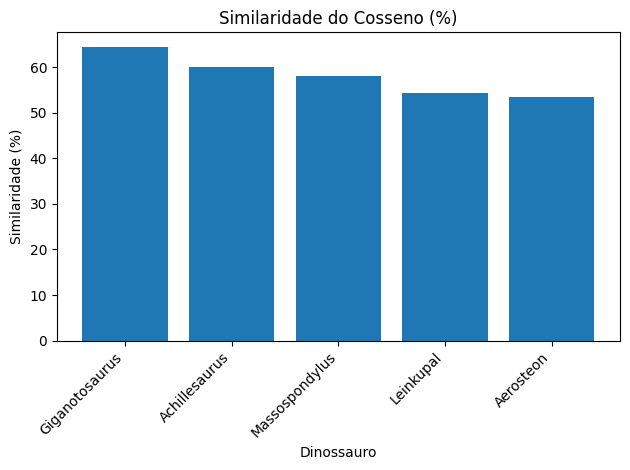

rank,nome,atributo,contrib_%
1,Giganotosaurus,height_m,28.75%
1,Giganotosaurus,length_m,23.35%
1,Giganotosaurus,diet,7.70%
1,Giganotosaurus,locomotion,7.70%
1,Giganotosaurus,geological,7.70%
2,Achillesaurus,height_m,18.32%
2,Achillesaurus,length_m,15.22%
2,Achillesaurus,diet,11.05%
2,Achillesaurus,locomotion,11.05%
2,Achillesaurus,geological,11.05%


Relatório HTML salvo em: relatorio_dinos.html


In [ ]:

consulta = CONFIG.get("example_query") or names.iloc[0]
k = int(CONFIG.get("k_top", 30))
print("Consulta:", consulta, "| k =", k)
df_top, contribs = recomendar_similares(consulta, k=k, incluir_contrib=True)

def style_top(d):
    return (d.style
            .hide(axis='index')
            .format({"similaridade_cosseno_%": "{:.2f}%", "distancia_cosseno": "{:.4f}"})
            .set_table_attributes('style="border-collapse:collapse; width:100%;"')
            .set_properties(**{"text-align":"left", "padding":"6px"})
            .set_caption("TOP-k Dinossauros Mais Similares (Cosseno)"))
display(style_top(df_top))

if not df_top.empty:
    plt.figure()
    plt.bar(df_top["nome"].astype(str), df_top["similaridade_cosseno_%"])
    plt.title("Similaridade do Cosseno (%)")
    plt.xlabel("Dinossauro")
    plt.ylabel("Similaridade (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

blocos = []
for (row_idx, contrib_lista), row in zip(contribs, df_top.itertuples(index=False)):
    top5 = contrib_lista[:5]
    for feat, pct in top5:
        blocos.append({"rank": row.rank, "nome": row.nome, "atributo": feat, "contrib_%": round(pct, 2)})
df_contrib = pd.DataFrame(blocos)

def style_contrib(d):
    return (d.style
            .hide(axis='index')
            .format({"contrib_%": "{:.2f}%"})
            .set_table_attributes('style="border-collapse:collapse; width:100%;"')
            .set_properties(**{"text-align":"left", "padding":"6px"})
            .set_caption("Contribuição aproximada por atributo (Top-5 por similar)"))
display(style_contrib(df_contrib))

if CONFIG.get("export_html", True):
    partes = []
    partes.append("<h1>MVP — Similaridade de Dinossauros (Cosine)</h1>")
    partes.append("<h2>Sumário de Pré-processamento</h2>")
    partes.append(df_sumario.to_html(index=False))
    partes.append("<h2>TOP-k Similares</h2>")
    partes.append(df_top.to_html(index=False))
    partes.append("<h2>Observações</h2>")
    partes.append("<ul><li>Similaridade do cosseno = 1 - distância do cosseno.</li><li>Contribuições por atributo são aproximadas.</li></ul>")
    html = "\n".join(partes)
    with open(CONFIG.get("html_out","relatorio_dinos.html"), "w", encoding="utf-8") as f:
        f.write(html)
    print("Relatório HTML salvo em:", CONFIG.get("html_out","relatorio_dinos.html"))


In [ ]:
# Faltantes por coluna (barra)
na_counts = df.isna().sum().sort_values(ascending=False)
if na_counts.sum() > 0:
    plt.figure()
    na_counts[na_counts>0].plot(kind="bar")
    plt.title("Valores faltantes por coluna")
    plt.ylabel("Qtde de faltantes")
    plt.xticks(rotation=45, ha="right")
    save_fig("faltantes_por_coluna.png")
    plt.show()
else:
    print("Sem valores faltantes. : )")


Sem valores faltantes. : )


↳ Figura salva em: figures/freq_categorias_common_name.png


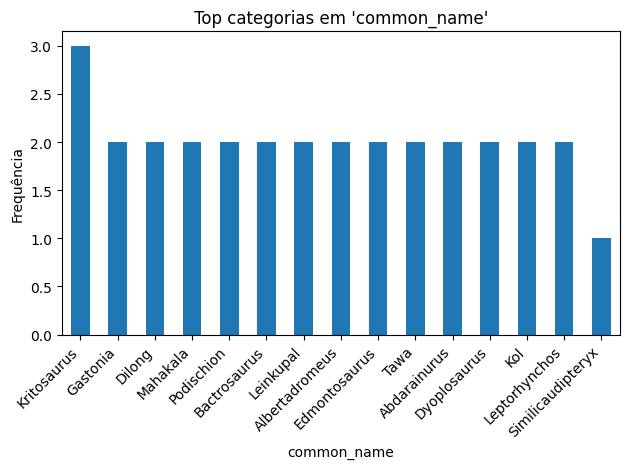

↳ Figura salva em: figures/freq_categorias_meaning.png


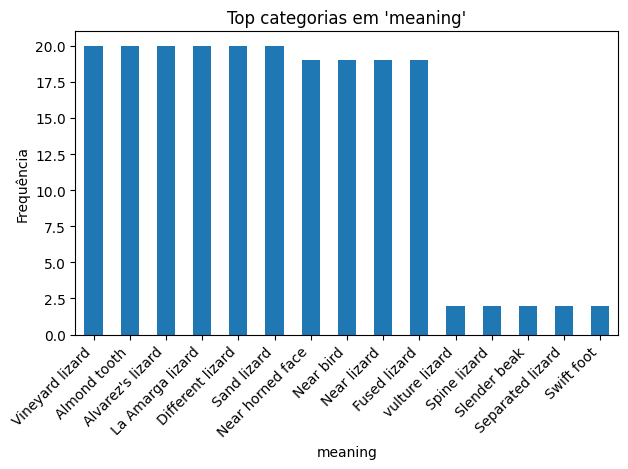

↳ Figura salva em: figures/freq_categorias_diet.png


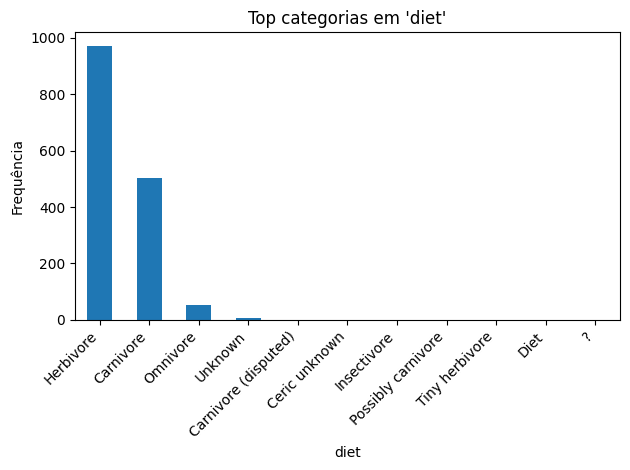

↳ Figura salva em: figures/freq_categorias_locomotion.png


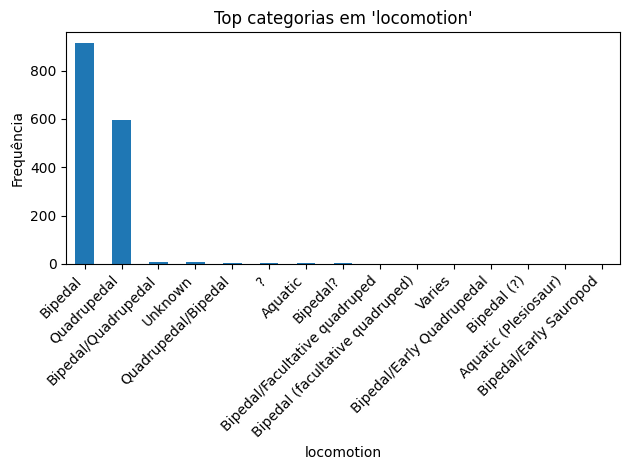

↳ Figura salva em: figures/freq_categorias_geological_period.png


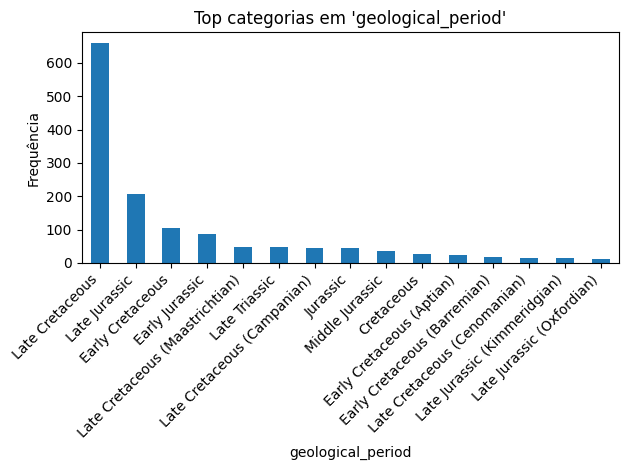

In [ ]:
# Frequência para até 3 colunas categóricas (top 15 categorias)
max_cols = min(5, len(cat_cols))
for c in cat_cols[:max_cols]:
    vc = df[c].astype(str).value_counts().head(15)
    plt.figure()
    vc.plot(kind="bar")
    plt.title(f"Top categorias em '{c}'")
    plt.ylabel("Frequência")
    plt.xticks(rotation=45, ha="right")
    save_fig(f"freq_categorias_{c}.png")
    plt.show()

↳ Figura salva em: figures/hist_length_m.png


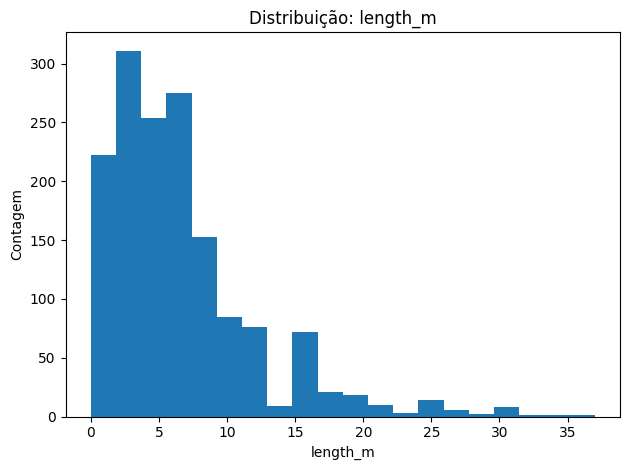

↳ Figura salva em: figures/hist_weight_kg.png


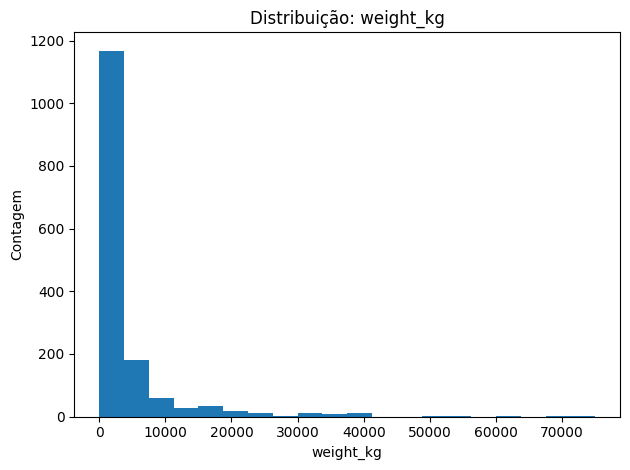

↳ Figura salva em: figures/hist_height_m.png


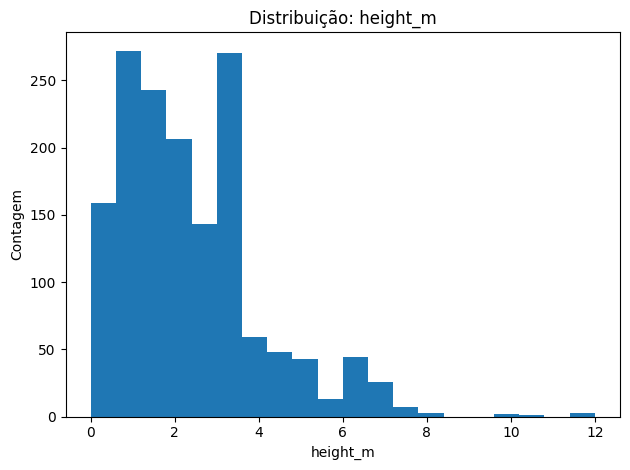

↳ Figura salva em: figures/hist_row_index.png


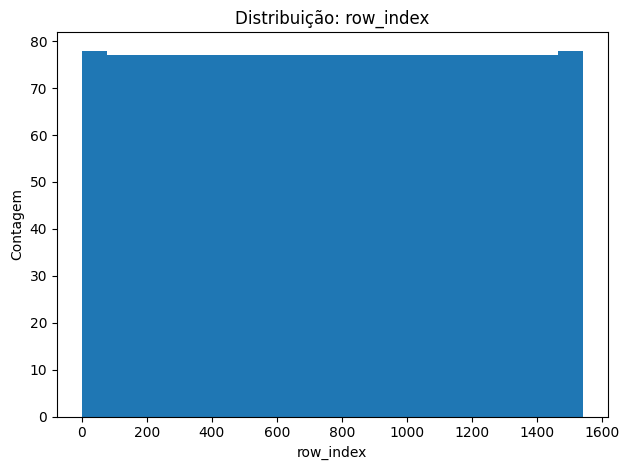

In [ ]:
# Histogramas para até 8 colunas numéricas
max_nums = min(8, len(num_cols))
for c in num_cols[:max_nums]:
    plt.figure()
    plt.hist(df[c].values, bins=20)
    plt.title(f"Distribuição: {c}")
    plt.xlabel(c)
    plt.ylabel("Contagem")
    save_fig(f"hist_{c}.png")
    plt.show()